In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [2]:
df = pd.read_csv('AppleStore.csv')

In [3]:
df.head()
#The following shows how the dataset is structured, with 16 columns and 7196 rows.

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        7197 non-null   int64  
 1   id                7197 non-null   int64  
 2   track_name        7197 non-null   object 
 3   size_bytes        7197 non-null   int64  
 4   currency          7197 non-null   object 
 5   price             7197 non-null   float64
 6   rating_count_tot  7197 non-null   int64  
 7   rating_count_ver  7197 non-null   int64  
 8   user_rating       7197 non-null   float64
 9   user_rating_ver   7197 non-null   float64
 10  ver               7197 non-null   object 
 11  cont_rating       7197 non-null   object 
 12  prime_genre       7197 non-null   object 
 13  sup_devices.num   7197 non-null   int64  
 14  ipadSc_urls.num   7197 non-null   int64  
 15  lang.num          7197 non-null   int64  
 16  vpp_lic           7197 non-null   int64  


In [5]:
df.describe()

#show the statistics of my dataset

,Unnamed: 0,id,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
count,7197.000000,7.197000e+03,7.197000e+03,7197.000000,7.197000e+03,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000
mean,4759.069612,8.631310e+08,1.991345e+08,1.726218,1.289291e+04,460.373906,3.526956,3.253578,37.361817,3.707100,5.434903,0.993053
std,3093.625213,2.712368e+08,3.592069e+08,5.833006,7.573941e+04,3920.455183,1.517948,1.809363,3.737715,1.986005,7.919593,0.083066
min,1.000000,2.816565e+08,5.898240e+05,0.000000,0.000000e+00,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000
25%,2090.000000,6.000937e+08,4.692275e+07,0.000000,2.800000e+01,1.000000,3.500000,2.500000,37.000000,3.000000,1.000000,1.000000
50%,4380.000000,9.781482e+08,9.715302e+07,0.000000,3.000000e+02,23.000000,4.000000,4.000000,37.000000,5.000000,1.000000,1.000000
75%,7223.000000,1.082310e+09,1.819249e+08,1.990000,2.793000e+03,140.000000,4.500000,4.500000,38.000000,5.000000,8.000000,1.000000
max,11097.000000,1.188376e+09,4.025970e+09,299.990000,2.974676e+06,177050.000000,5.000000,5.000000,47.000000,5.000000,75.000000,1.000000


In [6]:
prime_genre = df.groupby('prime_genre')['prime_genre'].agg(['count']).reset_index()
prime_genre.sort_values('count', ascending=False, inplace=True)
prime_genre

#show one of the categorical variables

,prime_genre,count
7,Games,3862
4,Entertainment,535
3,Education,453
14,Photo & Video,349
21,Utilities,248
8,Health & Fitness,180
15,Productivity,178
18,Social Networking,167
9,Lifestyle,144
11,Music,138


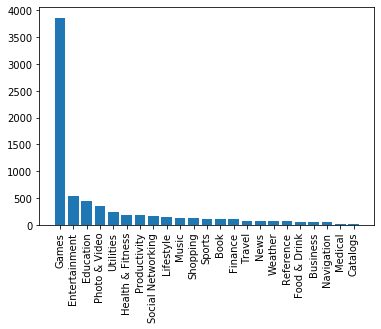

In [7]:
plt.bar(prime_genre['prime_genre'], prime_genre['count'])
plt.xticks(rotation='vertical')
plt.show()

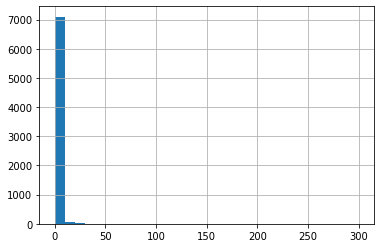

In [8]:
df['price'].hist(bins=30)

#shows one of the numeric variables, on which linear regression is based.

In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

def print_metrics(y_true, y_pred):
    print(f'MAE: {mean_absolute_error(y_true, y_pred)}')
    print(f'MSE: {mean_squared_error(y_true, y_pred)}')
    print(f'RMSE: {np.sqrt(mean_squared_error(y_true, y_pred))}')
    print(f'R2: {r2_score(y_true, y_pred)}')

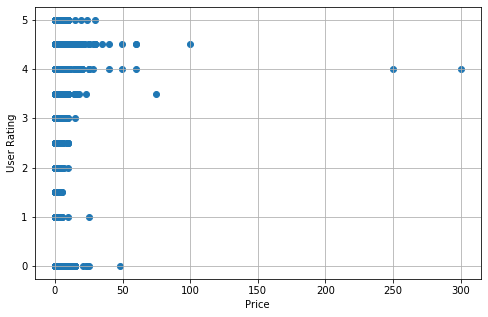

In [10]:
def linRegr(): 
    plt.figure(figsize=(8, 5))
    plt.scatter(df['price'], df['user_rating'])
    plt.xlabel('Price')
    plt.ylabel('User Rating')
    plt.grid()
    plt.show()
    
linRegr()
#Here I defined the method for calculating linear regression on my dataset, 
#defined using "Price" as an independent variable and "User Rating" as a dependent variable.
#before commenting on the plot, I defined the outliers, that is, all the applications that are priced above € 50

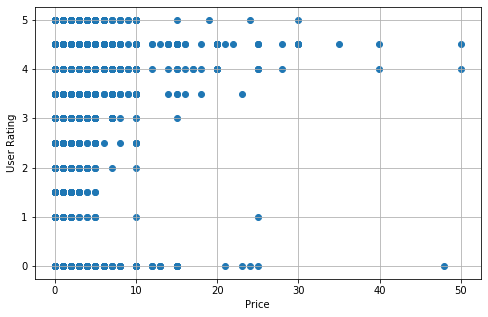

In [11]:
def deletePriceMore50():
    c=0
    lista=[]
    for i in df:
        if i=='price':
            for j in df[i]:
                if j>50:
                    lista.append(c)
                c=c+1 
    for i in lista:
        df.drop(i,inplace=True)
        
deletePriceMore50()
linRegr()

#Here I decided to eliminate all the occurrences of applications with a price above 50, defining them as outliers.
#I used this method and then called to make changes to the dataset.

In [12]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
X = df['price'].values.reshape(-1, 1)
y = df['user_rating'].values.reshape(-1, 1)
lr.fit(X, y)
y_pred = lr.predict(X)

print('Training error:')
print_metrics(y, lr.predict(X))

print()
print('Model parameters:')
print(lr.coef_, lr.intercept_)

#Here linear regression is performed using "Price" as an independent variable and "User Rating" as
#an dependent variable, as we can see from the results it is not what I expected as I believed there 
#could be a functional link between the two variables but it is not so, the coefficient R ^ 2 is very 
#close to zero while MSE is far from zero, we understand that the the model does not explain the dependent variable well.

Training error:
MAE: 1.133800490508944
MSE: 2.293232349942226
RMSE: 1.5143422169186944
R2: 0.005363670257376829

Model parameters:
[[0.0359177]] [3.4688145]


In [13]:
from sklearn.model_selection import train_test_split

# I leave the default proportions, 75% / 25%
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100)
lr.fit(X_train, y_train)

print('Training error:')
print_metrics(y_train, lr.predict(X_train))

print()
print('Test error:')
print_metrics(y_test, lr.predict(X_test))

#Here I tried to apply the Train / test slipt technique, leaving the proportions
#for training at 75% and for testing at 25%. We note that the results change little in R^2 and MSE, not very notable.

Training error:
MAE: 1.1249338013469883
MSE: 2.2684878698720263
RMSE: 1.506150015726198
R2: 0.006356741448204195

Test error:
MAE: 1.1600155091017754
MSE: 2.3678554555171334
RMSE: 1.5387837585304613
R2: 0.002317165270910304


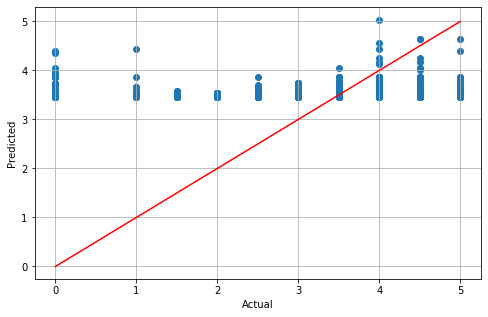

In [14]:
def plot_true_vs_pred(y_true, y_pred):
    plt.figure(figsize=(8, 5))
    plt.scatter(y_true, y_pred)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], color='red')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.grid()
    plt.show()
    
plot_true_vs_pred(y_test, lr.predict(X_test))

In [15]:
mlr_features = ['rating_count_tot', 'rating_count_ver', 'size_bytes']

X = df[mlr_features].values
y = df['price'].values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)

#Here I added features for multiple linear regression, independent variables, in particular "total rating count",
#"rating count per version" and "size in byte of the application". These features have been related to "Price",
# dipendent variable.

Training error:
MAE: 1.7500340311936737
MSE: 8.278904764538394
RMSE: 2.8773085973767905
R2: 0.12699843095353136

Test error:
MAE: 1.8179899692260522
MSE: 9.56222202337092
RMSE: 3.0922842727296143
R2: 0.03319407026046939


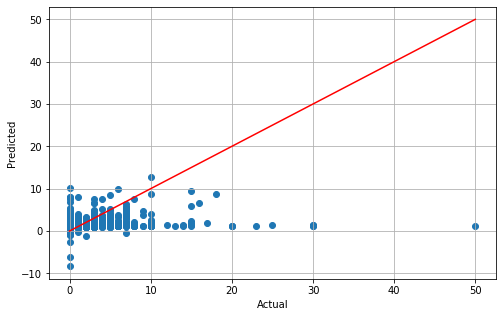

In [16]:
mlr = LinearRegression()
mlr.fit(X_train, y_train)

print('Training error:')
print_metrics(y_train, mlr.predict(X_train))
print()
print('Test error:')
print_metrics(y_test, mlr.predict(X_test))

plot_true_vs_pred(y_test, mlr.predict(X_test))

#Also here, the multiple linear regression gives bad results as we note
#the coefficient R ^ 2 very distant from 1 and the MSE very distant to zero, 
#from the plot it is in fact understood how the real model is distant from 
#the ideal model, therefore the features chosen are not have a strong addictive relationship with "Price".

Training error:
MAE: 1.7301390268350678
MSE: 8.156142399113202
RMSE: 2.855896076385344
R2: 0.13994358984642075

Test error:
MAE: 1.8097409776898168
MSE: 9.60106086685351
RMSE: 3.0985578688889306
R2: 0.02926719802393063


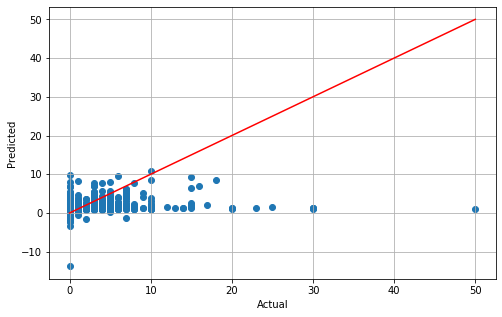

In [17]:
from sklearn.preprocessing import PolynomialFeatures

# Polynomial features: 2nd degree
poly2 = PolynomialFeatures(degree=2)
X_train_p2 = poly2.fit_transform(X_train)
X_test_p2 = poly2.fit_transform(X_test)

mlr2 = LinearRegression(normalize=True)
mlr2.fit(X_train_p2, y_train)

print('Training error:')
print_metrics(y_train, mlr2.predict(X_train_p2))
print()
print('Test error:')
print_metrics(y_test, mlr2.predict(X_test_p2))

plot_true_vs_pred(y_test, mlr2.predict(X_test_p2))

Training error:
MAE: 1.7185014977237427
MSE: 8.066290741594997
RMSE: 2.8401216068321786
R2: 0.14941835012278115

Test error:
MAE: 1.8595812589916605
MSE: 15.933905677811547
RMSE: 3.9917296599107943
R2: -0.6110266479451538


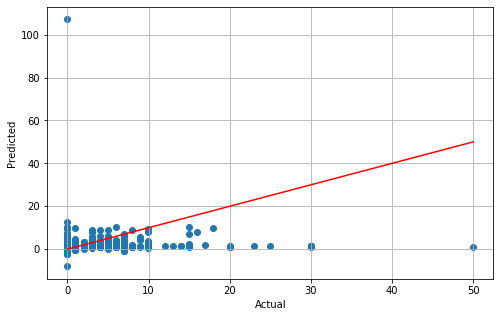

In [18]:
# Polynomial features: 3rd degree
poly3 = PolynomialFeatures(degree=3)
X_train_p3 = poly3.fit_transform(X_train)
X_test_p3 = poly3.fit_transform(X_test)

mlr3 = LinearRegression(normalize=True)
mlr3.fit(X_train_p3, y_train)

print('Training error:')
print_metrics(y_train, mlr3.predict(X_train_p3))
print()
print('Test error:')
print_metrics(y_test, mlr3.predict(X_test_p3))

plot_true_vs_pred(y_test, mlr3.predict(X_test_p3))

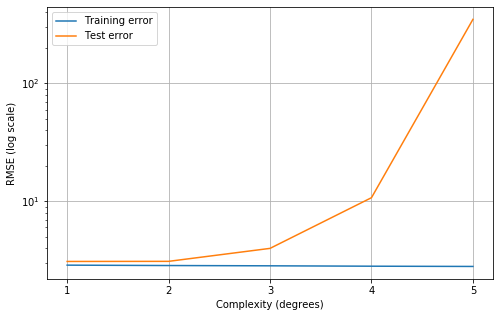

In [19]:
train_errors, test_errors = [], []
degrees = list(range(1, 6))

for deg in degrees:
    poly = PolynomialFeatures(degree=deg)
    X_train_p = poly.fit_transform(X_train)
    X_test_p = poly.fit_transform(X_test)

    mlrp = LinearRegression(normalize=True)
    mlrp.fit(X_train_p, y_train)
    
    # RMSE
    train_error = np.sqrt(mean_squared_error(y_train, mlrp.predict(X_train_p)))
    test_error = np.sqrt(mean_squared_error(y_test, mlrp.predict(X_test_p)))
    train_errors.append(train_error)
    test_errors.append(test_error)
    
plt.figure(figsize=(8, 5))
plt.plot(train_errors, label='Training error')
plt.plot(test_errors, label='Test error')
plt.xticks(range(0, 5), degrees)
plt.xlabel('Complexity (degrees)')
plt.ylabel('RMSE (log scale)')
plt.legend()
plt.yscale('log')
plt.grid()
plt.show()

C:\Users\Pasquale Siciliano\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21749.320280439977, tolerance: 5.113376203796364
  positive)
C:\Users\Pasquale Siciliano\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21749.32031150449, tolerance: 5.113376203796364
  positive)
C:\Users\Pasquale Siciliano\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21749.32062214535, tolerance: 5.113376203796364
  positive)
C:\Users\Pasquale Siciliano\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might

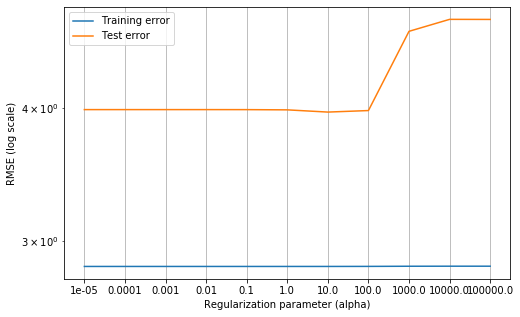

In [20]:
from sklearn.linear_model import Lasso

train_errors, test_errors = [], []
alphas = np.geomspace(1e-5, 1e5, 11)

# Using 3rd degree polynomial features
for alpha in alphas:
    rr = Lasso(alpha=alpha)
    rr.fit(X_train_p3, y_train)
    
    # RMSE
    train_error = np.sqrt(mean_squared_error(y_train, rr.predict(X_train_p3)))
    test_error = np.sqrt(mean_squared_error(y_test, rr.predict(X_test_p3)))
    train_errors.append(train_error)
    test_errors.append(test_error)
    
plt.figure(figsize=(8, 5))
plt.plot(train_errors, label='Training error')
plt.plot(test_errors, label='Test error')
plt.xticks(range(0, len(alphas)), alphas)
plt.xlabel('Regularization parameter (alpha)')
plt.ylabel('RMSE (log scale)')
plt.legend()
plt.yscale('log')
plt.grid()
plt.show()

Training error:
MAE: 1.7197623285765122
MSE: 8.074309566110728
RMSE: 2.8415329605884794
R2: 0.14857277373517408

Test error:
MAE: 1.887297225923703
MSE: 22.23938092619308
RMSE: 4.715864812120157
R2: -1.2485532442803486


C:\Users\Pasquale Siciliano\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21772.517191739124, tolerance: 5.113376203796364
  positive)


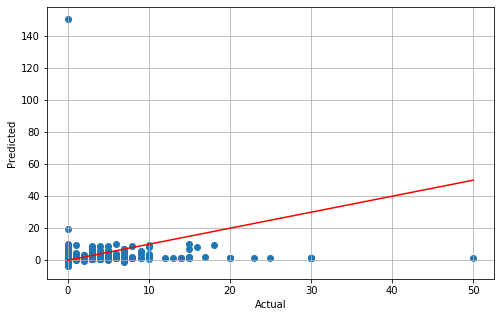

In [21]:
# Check with particular alpha value:
rr1 = Lasso(alpha=1000)
rr1.fit(X_train_p3, y_train)

print('Training error:')
print_metrics(y_train, rr1.predict(X_train_p3))
print()
print('Test error:')
print_metrics(y_test, rr1.predict(X_test_p3))

plot_true_vs_pred(y_test, rr1.predict(X_test_p3))


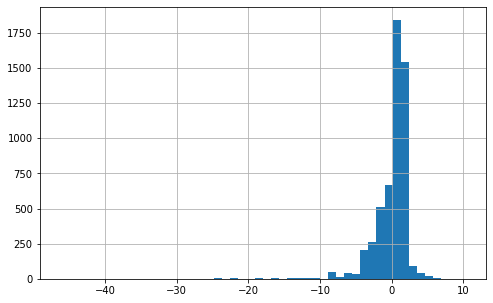

In [22]:
diffs = rr1.predict(X_train_p3) - y_train.reshape(-1)

plt.figure(figsize=(8, 5))
plt.hist(diffs, bins=50)
plt.grid()
plt.show()

In [23]:
# Start with Random Forest Regression
# select price and rating count tot for x
# select user rating for y
x = df.iloc[:, 5:6].values  
print(x) 
y = df.iloc[:, 8].values   
print(y)

[[3.99]
 [0.  ]
 [0.  ]
 ...
 [1.99]
 [0.  ]
 [0.  ]]
[4.  4.  3.5 ... 4.5 4.5 5. ]


In [24]:
# Fitting Random Forest Regression to the dataset 
# import the regressor 
from sklearn.ensemble import RandomForestRegressor 

# create regressor object 
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0) 

# fit the regressor with x and y data 
regressor.fit(x, y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

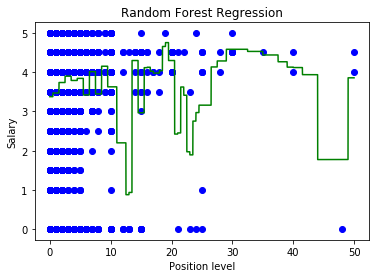

In [25]:
# Visualising the Random Forest Regression results 
# arange for creating a range of values 
# from min value of x to max  
# value of x with a difference of 0.01  
# between two consecutive values 
X_grid = np.arange(min(x), max(x), 0.01)  

# reshape for reshaping the data into a len(X_grid)*1 array,  
# i.e. to make a column out of the X_grid value                   
X_grid = X_grid.reshape((len(X_grid), 1)) 

# Scatter plot for original data 
plt.scatter(x, y, color = 'blue')   

# plot predicted data 
plt.plot(X_grid, regressor.predict(X_grid),  
         color = 'green')  
plt.title('Random Forest Regression') 
plt.xlabel('Position level') 
plt.ylabel('Salary') 
plt.show()

In [26]:
# start of Classification task, I used the Random Forest and Decision Tree

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def print_metrics(y_true, y_pred):
    print(f'Accuracy : {accuracy_score(y_true, y_pred):.2f}')
    print(f'Precision: {precision_score(y_true, y_pred):.2f}')
    print(f'Recall   : {recall_score(y_true, y_pred):.2f}')
    print(f'F1-score : {f1_score(y_true, y_pred):.2f}')

In [27]:
def plot_decision_boundaries(X, y, feature_labels, class_labels, model=None):
    
    reduced_data = X[:, :2]

    h = .01         
    margin = 0.5

    x_min, x_max = reduced_data[:, 0].min() - margin, reduced_data[:, 0].max() + margin
    y_min, y_max = reduced_data[:, 1].min() - margin, reduced_data[:, 1].max() + margin
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    if model:
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])    

    x_min, x_max = X[:, 0].min() - margin, X[:, 0].max() + margin
    y_min, y_max = X[:, 1].min() - margin, X[:, 1].max() + margin
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    if model:
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
        plt.contourf(xx, yy, Z, alpha=0.4)
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8, edgecolors='black')
    plt.xlabel(feature_labels[0])
    plt.ylabel(feature_labels[1])
    return plt

Text(0.5, 1.0, 'User Rating')

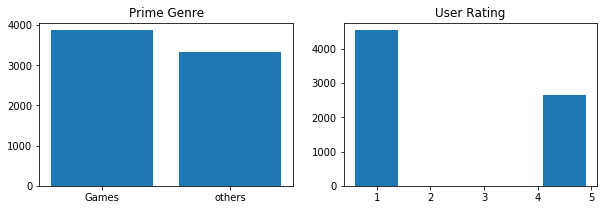

In [28]:
df['prg'] = df['prime_genre'].apply(lambda x: x if x == 'Games' else 'others')
df['usr'] = df['user_rating'].apply(lambda x: x if x == 4.5 else 1)

def plot_counts(df, col):
    users_count2 = df.groupby(col)[col].agg(['count']).reset_index()
    users_count2.sort_values('count', ascending=False, inplace=True)
    plt.bar(users_count2[col], users_count2['count'])
    
fig = plt.figure(figsize=(10, 3))

fig.add_subplot(121)
plot_counts(df, 'prg')
plt.title('Prime Genre')

fig.add_subplot(122)
plot_counts(df, 'usr')
plt.title('User Rating')

In [29]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import plot_confusion_matrix, plot_roc_curve

filter1 = (df['price'].notnull())
df_filtered = df[filter1].reset_index()

train_indexes, test_indexes = train_test_split(df_filtered.index, random_state=150)

X = df_filtered[['user_rating', 'price']].values
feature_names = ['User Rating', 'Price']

X = StandardScaler().fit_transform(X)

X_train, X_test = X[train_indexes], X[test_indexes]

le_orbit, le_users = LabelEncoder(), LabelEncoder()
y_orbit = le_orbit.fit_transform(df_filtered['prg'])
y_users = le_users.fit_transform(df_filtered['usr'])
y_orbit_train, y_orbit_test = y_orbit[train_indexes], y_orbit[test_indexes]
y_users_train, y_users_test = y_users[train_indexes], y_users[test_indexes]

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [31]:
dt_orbit1 = DecisionTreeClassifier()
rfc_orbit1= RandomForestClassifier()

In [32]:
dt_orbit1.fit(X_train, y_orbit_train)
rfc_orbit1.fit(X_train, y_orbit_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Text(0.5, 1.0, 'Decision tree')

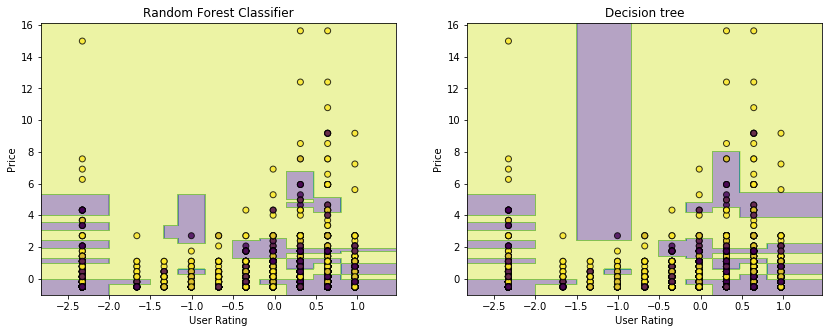

In [33]:
fig = plt.figure(figsize=(14, 5))

fig.add_subplot(121)
plot_decision_boundaries(X_train, y_orbit_train, 
                         feature_names, le_orbit.classes_, rfc_orbit1)
plt.title('Random Forest Classifier')

fig.add_subplot(122)
plot_decision_boundaries(X_train, y_orbit_train, 
                         feature_names, le_orbit.classes_, dt_orbit1)
plt.title('Decision tree')

In [34]:
print('Random Forest Classifier')
print('-------------------')
print('Training set:')
print_metrics(y_orbit_train, rfc_orbit1.predict(X_train))

print()
print('Test set:')
print_metrics(y_orbit_test, rfc_orbit1.predict(X_test))

Random Forest Classifier
-------------------
Training set:
Accuracy : 0.62
Precision: 0.63
Recall   : 0.47
F1-score : 0.54

Test set:
Accuracy : 0.62
Precision: 0.61
Recall   : 0.47
F1-score : 0.53


In [35]:
print('Decision tree')
print('-------------------')
print('Training set:')
print_metrics(y_orbit_train, dt_orbit1.predict(X_train))

print()
print('Test set:')
print_metrics(y_orbit_test, dt_orbit1.predict(X_test))

Decision tree
-------------------
Training set:
Accuracy : 0.62
Precision: 0.63
Recall   : 0.46
F1-score : 0.54

Test set:
Accuracy : 0.62
Precision: 0.61
Recall   : 0.46
F1-score : 0.53


Text(0.5, 1.0, 'Decision tree')

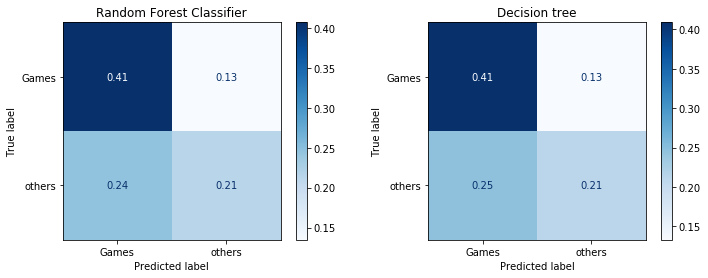

In [36]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
plot_confusion_matrix(rfc_orbit1, X_test, y_orbit_test,
                      cmap=plt.cm.Blues, normalize='all', 
                      display_labels=le_orbit.classes_, ax=ax1)
ax1.set_title('Random Forest Classifier')

plot_confusion_matrix(dt_orbit1, X_test, y_orbit_test,
                      cmap=plt.cm.Blues, normalize='all', 
                      display_labels=le_orbit.classes_, ax=ax2)
ax2.set_title('Decision tree')

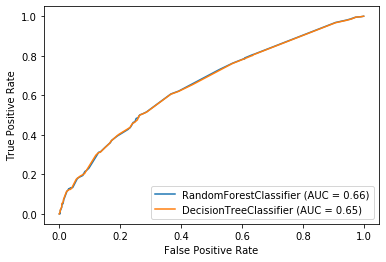

In [37]:
roc = plot_roc_curve(rfc_orbit1, X_test, y_orbit_test)
plot_roc_curve(dt_orbit1, X_test, y_orbit_test, ax=roc.ax_)

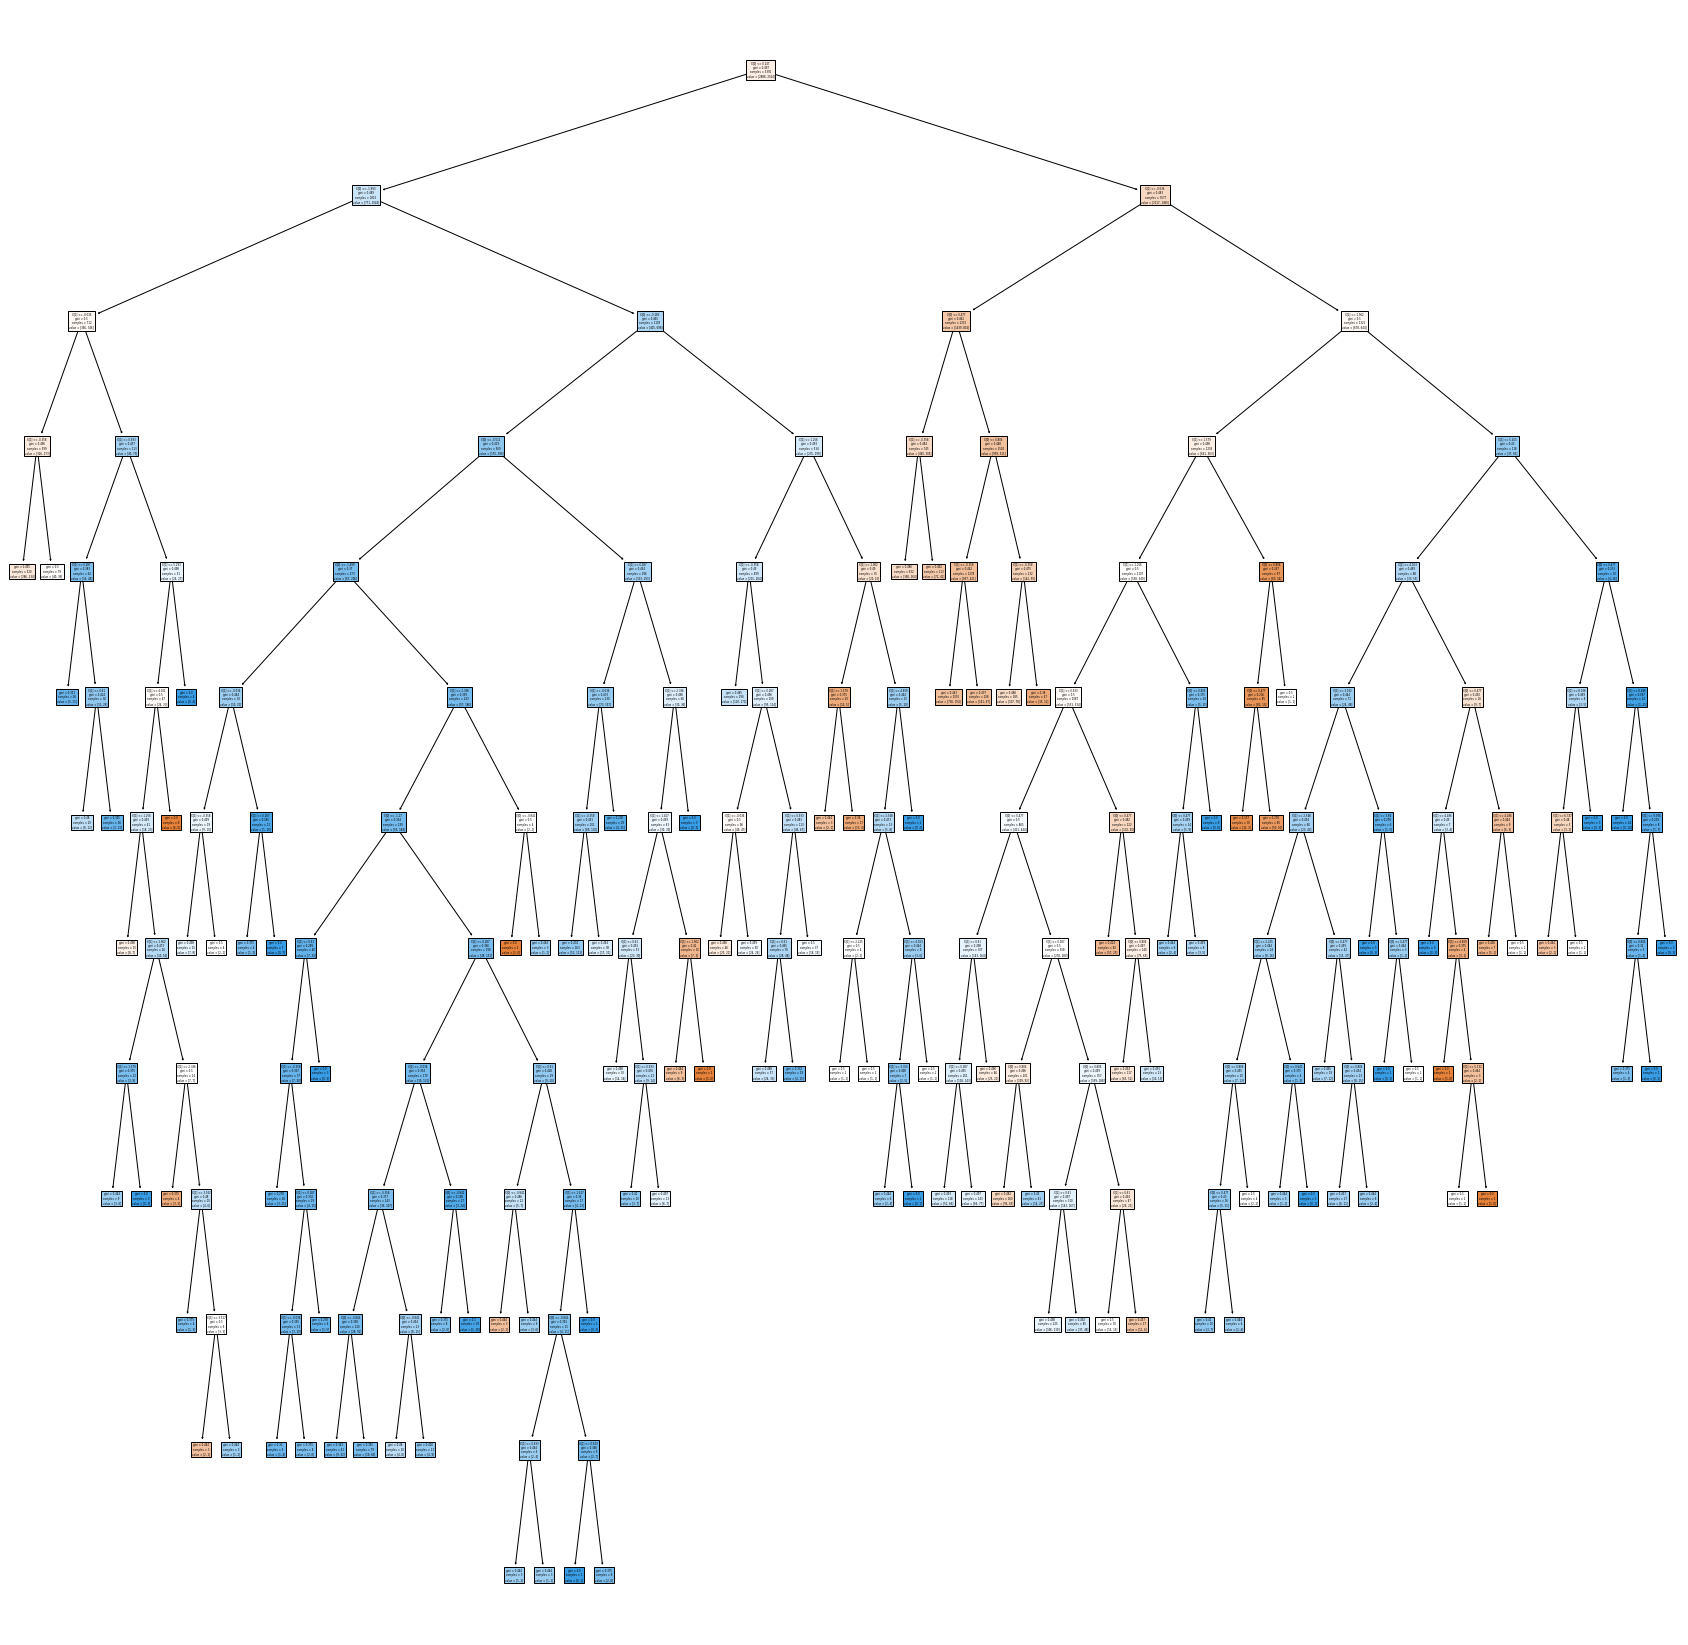

In [38]:
# Decision tree visualization
from sklearn.tree import plot_tree

plt.figure(figsize=(30, 30))
plot_tree(dt_orbit1, filled=True)
plt.show()

In [39]:
rfc_users1 = RandomForestClassifier()
dt_users1 = DecisionTreeClassifier()

rfc_users1.fit(X_train, y_users_train)
dt_users1.fit(X_train, y_users_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Text(0.5, 1.0, 'Decision tree')

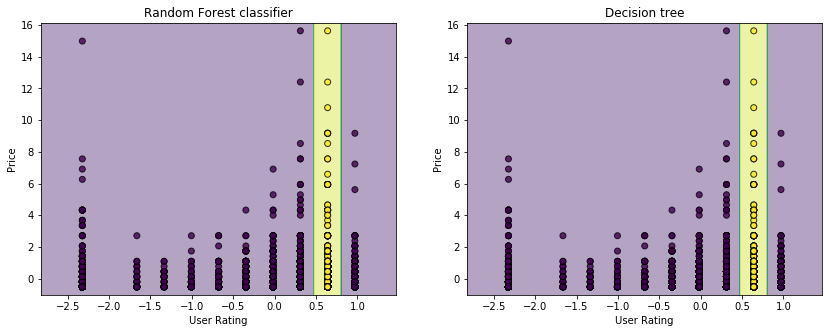

In [40]:
fig = plt.figure(figsize=(14, 5))

fig.add_subplot(121)
plot_decision_boundaries(X_train, y_users_train, 
                         feature_names, le_users.classes_, rfc_users1)
plt.title('Random Forest classifier')

fig.add_subplot(122)
plot_decision_boundaries(X_train, y_users_train, 
                         feature_names, le_users.classes_, dt_users1)
plt.title('Decision tree')

In [41]:
print('Random Forest Classifier')
print('-------------------')
print('Training set:')
print_metrics(y_users_train, rfc_users1.predict(X_train))

print()
print('Test set:')
print_metrics(y_users_test, rfc_users1.predict(X_test))

Random Forest Classifier
-------------------
Training set:
Accuracy : 1.00
Precision: 1.00
Recall   : 1.00
F1-score : 1.00

Test set:
Accuracy : 1.00
Precision: 1.00
Recall   : 1.00
F1-score : 1.00


In [42]:
 print('Decision tree')
print('-------------------')
print('Training set:')
print_metrics(y_users_train, dt_users1.predict(X_train))

print()
print('Test set:')
print_metrics(y_users_test, dt_users1.predict(X_test))

Decision tree
-------------------
Training set:
Accuracy : 1.00
Precision: 1.00
Recall   : 1.00
F1-score : 1.00

Test set:
Accuracy : 1.00
Precision: 1.00
Recall   : 1.00
F1-score : 1.00


Text(0.5, 1.0, 'Decision tree')

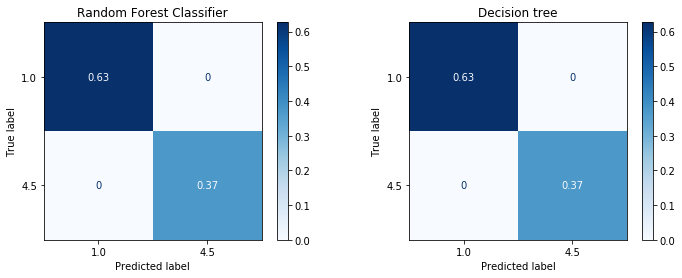

In [43]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
plot_confusion_matrix(rfc_users1, X_test, y_users_test,
                      cmap=plt.cm.Blues, normalize='all', 
                      display_labels=le_users.classes_, ax=ax1)
ax1.set_title('Random Forest Classifier')

plot_confusion_matrix(dt_users1, X_test, y_users_test,
                      cmap=plt.cm.Blues, normalize='all', 
                      display_labels=le_users.classes_, ax=ax2)
ax2.set_title('Decision tree')

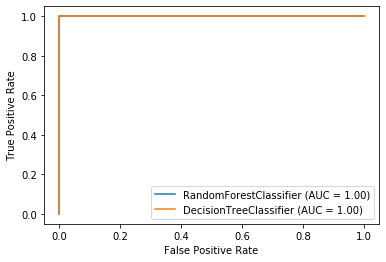

In [44]:
roc = plot_roc_curve(rfc_users1, X_test, y_users_test)
plot_roc_curve(dt_users1, X_test, y_users_test, ax=roc.ax_)

In [45]:
X2 = df_filtered[[
    'price', 'user_rating',
    'rating_count_tot']].values
X2 = StandardScaler().fit_transform(X2)
X2_train, X2_test = X2[train_indexes], X2[test_indexes]

X3 = df_filtered[[
    'price', 'user_rating',
    'rating_count_tot','sup_devices.num', 'user_rating_ver',]].values
X3 = StandardScaler().fit_transform(X3)
X3_train, X3_test = X3[train_indexes], X3[test_indexes]

In [46]:
rfc_users2 = RandomForestClassifier()
rfc_users3 = RandomForestClassifier()

rfc_users2.fit(X2_train, y_users_train)
rfc_users3.fit(X3_train, y_users_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [47]:
print('Random Forest Classifier (3 features)')
print('-------------------')
print('Training set:')
print_metrics(y_users_train, rfc_users2.predict(X2_train))

print()
print('Test set:')
print_metrics(y_users_test, rfc_users2.predict(X2_test))

Random Forest Classifier (3 features)
-------------------
Training set:
Accuracy : 1.00
Precision: 1.00
Recall   : 1.00
F1-score : 1.00

Test set:
Accuracy : 1.00
Precision: 1.00
Recall   : 1.00
F1-score : 1.00


In [48]:
print('Random Forest Classifier (5 features)')
print('-------------------')
print('Training set:')
print_metrics(y_users_train, rfc_users3.predict(X3_train))

print()
print('Test set:')
print_metrics(y_users_test, rfc_users3.predict(X3_test))

Random Forest Classifier (5 features)
-------------------
Training set:
Accuracy : 1.00
Precision: 1.00
Recall   : 1.00
F1-score : 1.00

Test set:
Accuracy : 1.00
Precision: 1.00
Recall   : 1.00
F1-score : 1.00


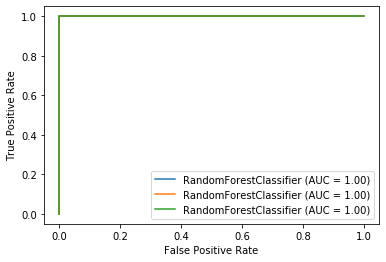

In [49]:
 roc = plot_roc_curve(rfc_users1, X_test, y_users_test)
plot_roc_curve(rfc_users2, X2_test, y_users_test, ax=roc.ax_)
plot_roc_curve(rfc_users3, X3_test, y_users_test, ax=roc.ax_)

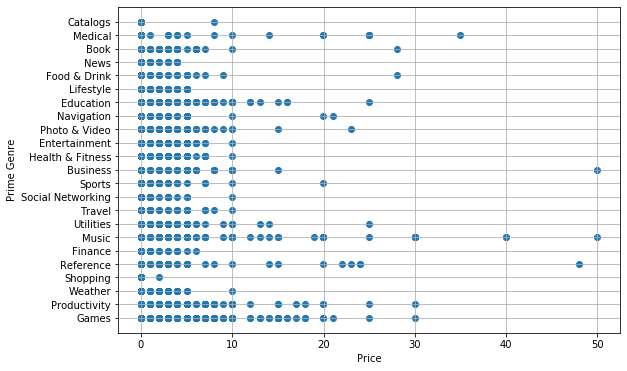

In [50]:
plt.figure(figsize=(9, 6))
plt.scatter(df['price'], df['prime_genre'])
plt.xlabel('Price')
plt.ylabel('Prime Genre')
plt.grid()

In [51]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = df[['price', 'user_rating']].values
X = scaler.fit_transform(X)

In [52]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

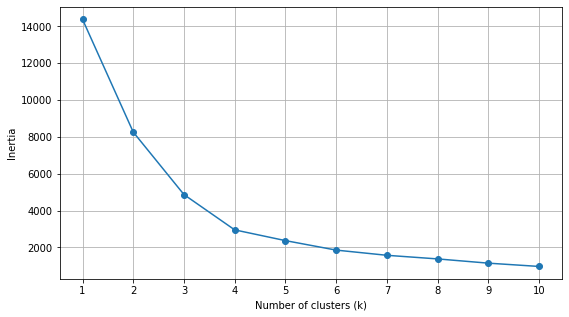

In [53]:
inertia_scores = []
k_values = list(range(1, 10 + 1))
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    y_pred = kmeans.fit_predict(X)
    inertia_scores.append(kmeans.inertia_)
    
plt.figure(figsize=(9, 5))
plt.plot(k_values, inertia_scores, marker='o')
plt.xticks(k_values)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.grid()

C:\Users\Pasquale Siciliano\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  """


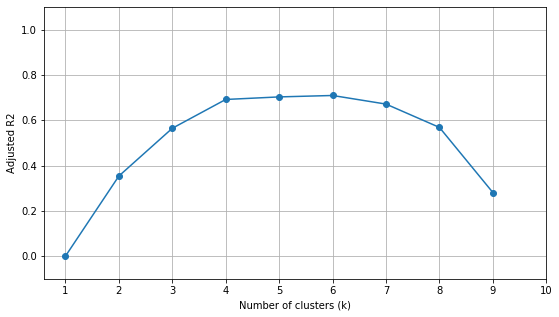

In [54]:
# Adjusted R2
n = max(k_values)
adjusted_r2_scores = [
    1 - ((inertia * (n - 1)) / (inertia_scores[0] * (n - k)))
    for inertia, k in zip(inertia_scores, k_values)
]

plt.figure(figsize=(9, 5))
plt.plot(k_values, adjusted_r2_scores, marker='o')
plt.xticks(k_values)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Adjusted R2')
plt.ylim([-0.1, 1.1])
plt.grid()

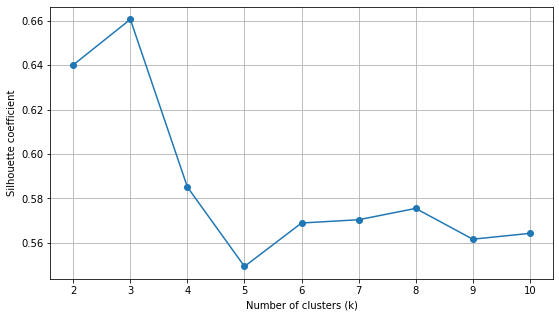

In [55]:
silhouette_scores = []
k_values = list(range(2, 10 + 1))
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    y_pred = kmeans.fit_predict(X)
    score = silhouette_score(X, y_pred)
    silhouette_scores.append(score)

    
plt.figure(figsize=(9, 5))
plt.plot(k_values, silhouette_scores, marker='o')
plt.xticks(k_values)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette coefficient')
plt.grid()

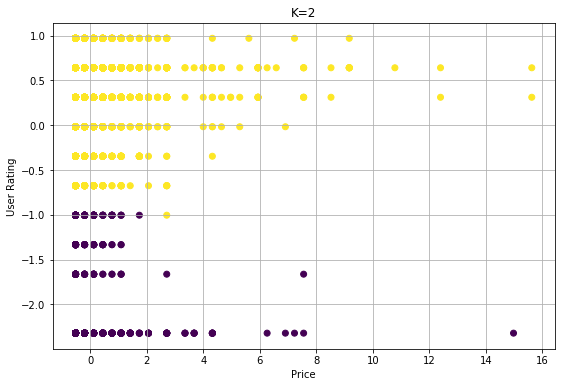

In [56]:
kmeans_2 = KMeans(n_clusters=2)
kmeans_2_pred = kmeans_2.fit_predict(X)

plt.figure(figsize=(9, 6))
plt.scatter(X[:, 0], X[:, 1], c=kmeans_2_pred)
plt.xlabel('Price')
plt.ylabel('User Rating')
plt.title('K=2')
plt.grid()

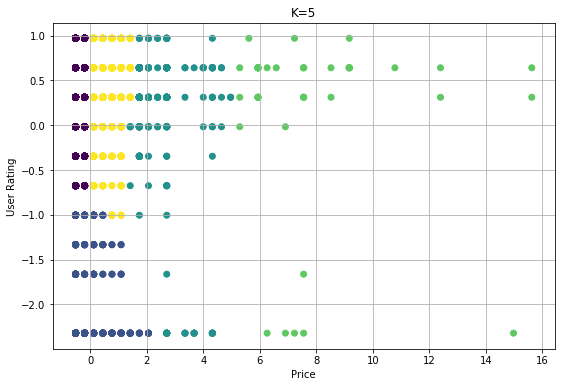

In [57]:
kmeans_5 = KMeans(n_clusters=5, random_state=12)
kmeans_5_pred = kmeans_5.fit_predict(X)

plt.figure(figsize=(9, 6))
plt.scatter(X[:, 0], X[:, 1], c=kmeans_5_pred)
plt.xlabel('Price')
plt.ylabel('User Rating')
plt.title('K=5')
plt.grid()

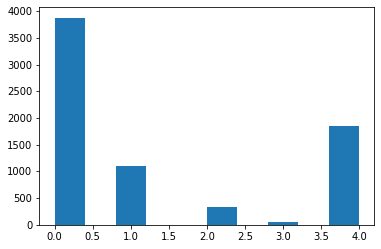

In [58]:
plt.figure()
plt.hist(kmeans_5_pred)
plt.show()

In [59]:
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1 
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    dendrogram(linkage_matrix, **kwargs)

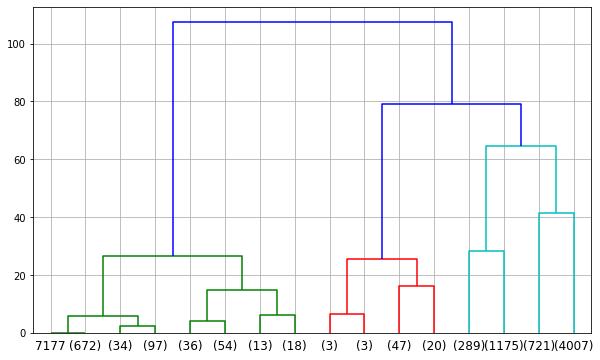

In [60]:
from sklearn.cluster import AgglomerativeClustering

hc0 = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
hc0.fit(X)

plt.figure(figsize=(10, 6))
plot_dendrogram(hc0, truncate_mode='level', p=3)
plt.grid()

In [61]:
hc = AgglomerativeClustering(distance_threshold=25, n_clusters=None)
hc_pred = hc.fit_predict(X)

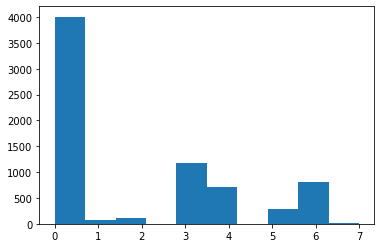

In [62]:
plt.figure()
plt.hist(hc_pred)
plt.show()

No handles with labels found to put in legend.


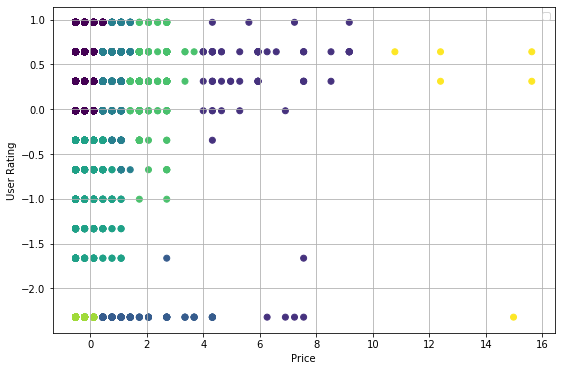

In [63]:
plt.figure(figsize=(9, 6))
plt.scatter(X[:, 0], X[:, 1], c=hc_pred)
plt.xlabel('Price')
plt.ylabel('User Rating')
plt.legend()
plt.grid()

In [64]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

df['prg'] = df['prime_genre'].apply(lambda x: x if x == 'Games' else 'others')

filter1 = (df['price'].notnull())
df_filtered = df[filter1].reset_index()

# Train/test/validation split: 60%/20%/20%
train_indexes, test_indexes = train_test_split(df_filtered.index, test_size=0.2, random_state=100)
train_indexes, val_indexes = train_test_split(train_indexes, test_size=0.25, random_state=101)
X = df_filtered[[
    'price', 'user_rating',
    'rating_count_tot','sup_devices.num', 'user_rating_ver',]].values
X = StandardScaler().fit_transform(X)
X_train, X_test, X_val = X[train_indexes], X[test_indexes], X[val_indexes]

le_users = LabelEncoder()
y_users = le_users.fit_transform(df_filtered['prg'])
y_train, y_test, y_val = y_users[train_indexes], y_users[test_indexes], y_users[val_indexes]

In [65]:
def plot_history(history, metric):
    plt.figure(figsize=(10, 5))
    plt.plot(history[metric], label='training')
    plt.plot(history[f'val_{metric}'], label='validation')
    plt.xlabel('Epochs')
    plt.ylabel(metric)
    plt.legend()
    plt.show()

In [66]:
clf1 = keras.Sequential([
    keras.layers.Dense(10, activation='sigmoid', input_shape=(6,5)),
    keras.layers.Dense(1, activation='sigmoid')
])

clf1.compile(
    optimizer=keras.optimizers.SGD(learning_rate=0.01), 
    loss='binary_crossentropy', 
    metrics=['accuracy'])

In [67]:
res1 = clf1.fit(
    X_train, y_train, 
    validation_data=(X_val, y_val), 
    epochs=100)

Epoch 1/100
135/135 [==============================] - 0s 2ms/step - loss: 0.7418 - accuracy: 0.5306 - val_loss: 0.7248 - val_accuracy: 0.5063
Epoch 2/100
135/135 [==============================] - 0s 1ms/step - loss: 0.7165 - accuracy: 0.5025 - val_loss: 0.7145 - val_accuracy: 0.4618
Epoch 3/100
135/135 [==============================] - 0s 1ms/step - loss: 0.7101 - accuracy: 0.4597 - val_loss: 0.7092 - val_accuracy: 0.4548
Epoch 4/100
135/135 [==============================] - 0s 1ms/step - loss: 0.7057 - accuracy: 0.4650 - val_loss: 0.7047 - val_accuracy: 0.4868
Epoch 5/100
135/135 [==============================] - 0s 1ms/step - loss: 0.7018 - accuracy: 0.4845 - val_loss: 0.7006 - val_accuracy: 0.4944
Epoch 6/100
135/135 [==============================] - 0s 1ms/step - loss: 0.6982 - accuracy: 0.5074 - val_loss: 0.6969 - val_accuracy: 0.5236
Epoch 7/100
135/135 [==============================] - 0s 1ms/step - loss: 0.6950 - accuracy: 0.5306 - val_loss: 0.6935 - val_accuracy: 0.5306

135/135 [==============================] - 0s 1ms/step - loss: 0.6480 - accuracy: 0.6066 - val_loss: 0.6411 - val_accuracy: 0.6224
Epoch 54/100
135/135 [==============================] - 0s 894us/step - loss: 0.6476 - accuracy: 0.6078 - val_loss: 0.6407 - val_accuracy: 0.6280
Epoch 55/100
135/135 [==============================] - 0s 946us/step - loss: 0.6471 - accuracy: 0.6108 - val_loss: 0.6402 - val_accuracy: 0.6300
Epoch 56/100
135/135 [==============================] - 0s 960us/step - loss: 0.6467 - accuracy: 0.6092 - val_loss: 0.6397 - val_accuracy: 0.6280
Epoch 57/100
135/135 [==============================] - 0s 1ms/step - loss: 0.6463 - accuracy: 0.6089 - val_loss: 0.6393 - val_accuracy: 0.6245
Epoch 58/100
135/135 [==============================] - 0s 990us/step - loss: 0.6459 - accuracy: 0.6083 - val_loss: 0.6389 - val_accuracy: 0.6287
Epoch 59/100
135/135 [==============================] - 0s 1ms/step - loss: 0.6455 - accuracy: 0.6087 - val_loss: 0.6384 - val_accuracy: 0.63

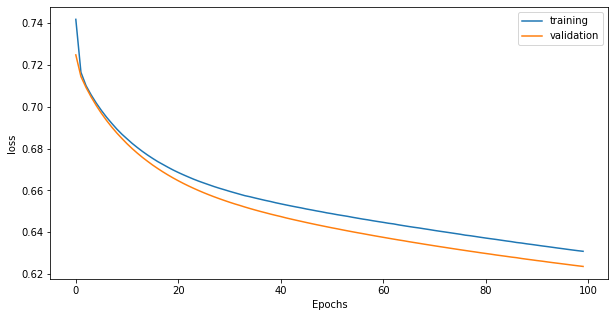

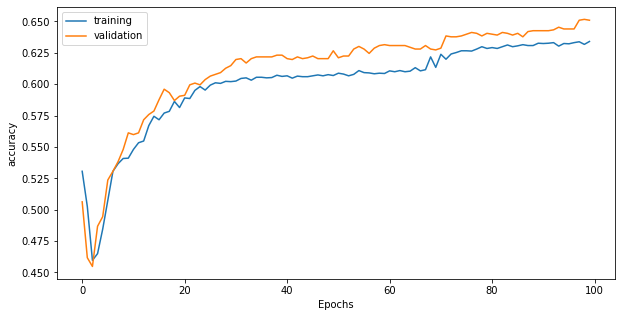

In [68]:
plot_history(res1.history, 'loss')
plot_history(res1.history, 'accuracy')

In [69]:
clf2 = keras.Sequential([
    keras.layers.Dense(20, activation='relu', input_shape=(6,5)),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])


clf2.compile(
    optimizer=keras.optimizers.SGD(learning_rate=0.01), 
    loss='binary_crossentropy', 
    metrics=['accuracy'])

In [70]:
res2 = clf2.fit(
    X_train, y_train, 
    validation_data=(X_val, y_val),
    epochs=200)

Epoch 1/200
135/135 [==============================] - 0s 1ms/step - loss: 0.6863 - accuracy: 0.5872 - val_loss: 0.6647 - val_accuracy: 0.6168
Epoch 2/200
135/135 [==============================] - 0s 1ms/step - loss: 0.6689 - accuracy: 0.5983 - val_loss: 0.6537 - val_accuracy: 0.6210
Epoch 3/200
135/135 [==============================] - 0s 1ms/step - loss: 0.6599 - accuracy: 0.6064 - val_loss: 0.6460 - val_accuracy: 0.6252
Epoch 4/200
135/135 [==============================] - 0s 1ms/step - loss: 0.6534 - accuracy: 0.6071 - val_loss: 0.6401 - val_accuracy: 0.6321
Epoch 5/200
135/135 [==============================] - 0s 1ms/step - loss: 0.6481 - accuracy: 0.6127 - val_loss: 0.6350 - val_accuracy: 0.6391
Epoch 6/200
135/135 [==============================] - 0s 1ms/step - loss: 0.6433 - accuracy: 0.6143 - val_loss: 0.6304 - val_accuracy: 0.6405
Epoch 7/200
135/135 [==============================] - 0s 1ms/step - loss: 0.6387 - accuracy: 0.6171 - val_loss: 0.6265 - val_accuracy: 0.6439

135/135 [==============================] - 0s 1ms/step - loss: 0.5803 - accuracy: 0.6926 - val_loss: 0.5753 - val_accuracy: 0.7045
Epoch 54/200
135/135 [==============================] - 0s 998us/step - loss: 0.5794 - accuracy: 0.6991 - val_loss: 0.5751 - val_accuracy: 0.6975
Epoch 55/200
135/135 [==============================] - 0s 1ms/step - loss: 0.5789 - accuracy: 0.6949 - val_loss: 0.5751 - val_accuracy: 0.7024
Epoch 56/200
135/135 [==============================] - 0s 1ms/step - loss: 0.5782 - accuracy: 0.6975 - val_loss: 0.5738 - val_accuracy: 0.7072
Epoch 57/200
135/135 [==============================] - 0s 990us/step - loss: 0.5779 - accuracy: 0.6989 - val_loss: 0.5736 - val_accuracy: 0.7031
Epoch 58/200
135/135 [==============================] - 0s 1ms/step - loss: 0.5772 - accuracy: 0.6994 - val_loss: 0.5731 - val_accuracy: 0.7038
Epoch 59/200
135/135 [==============================] - 0s 997us/step - loss: 0.5766 - accuracy: 0.7024 - val_loss: 0.5733 - val_accuracy: 0.7058

135/135 [==============================] - 0s 997us/step - loss: 0.5590 - accuracy: 0.7165 - val_loss: 0.5610 - val_accuracy: 0.7142
Epoch 110/200
135/135 [==============================] - 0s 1ms/step - loss: 0.5590 - accuracy: 0.7149 - val_loss: 0.5601 - val_accuracy: 0.7051
Epoch 111/200
135/135 [==============================] - 0s 1ms/step - loss: 0.5591 - accuracy: 0.7130 - val_loss: 0.5602 - val_accuracy: 0.7156
Epoch 112/200
135/135 [==============================] - 0s 1ms/step - loss: 0.5580 - accuracy: 0.7144 - val_loss: 0.5611 - val_accuracy: 0.7065
Epoch 113/200
135/135 [==============================] - 0s 1ms/step - loss: 0.5583 - accuracy: 0.7151 - val_loss: 0.5614 - val_accuracy: 0.7079
Epoch 114/200
135/135 [==============================] - 0s 1ms/step - loss: 0.5583 - accuracy: 0.7137 - val_loss: 0.5606 - val_accuracy: 0.7114
Epoch 115/200
135/135 [==============================] - 0s 1ms/step - loss: 0.5580 - accuracy: 0.7126 - val_loss: 0.5604 - val_accuracy: 0.71

135/135 [==============================] - 0s 1ms/step - loss: 0.5508 - accuracy: 0.7174 - val_loss: 0.5590 - val_accuracy: 0.7156
Epoch 166/200
135/135 [==============================] - 0s 997us/step - loss: 0.5502 - accuracy: 0.7211 - val_loss: 0.5600 - val_accuracy: 0.7065
Epoch 167/200
135/135 [==============================] - 0s 1ms/step - loss: 0.5499 - accuracy: 0.7211 - val_loss: 0.5583 - val_accuracy: 0.7135
Epoch 168/200
135/135 [==============================] - 0s 1ms/step - loss: 0.5495 - accuracy: 0.7207 - val_loss: 0.5600 - val_accuracy: 0.7135
Epoch 169/200
135/135 [==============================] - 0s 1ms/step - loss: 0.5496 - accuracy: 0.7214 - val_loss: 0.5604 - val_accuracy: 0.7038
Epoch 170/200
135/135 [==============================] - 0s 1ms/step - loss: 0.5497 - accuracy: 0.7188 - val_loss: 0.5613 - val_accuracy: 0.6996
Epoch 171/200
135/135 [==============================] - 0s 1ms/step - loss: 0.5490 - accuracy: 0.7246 - val_loss: 0.5593 - val_accuracy: 0.71

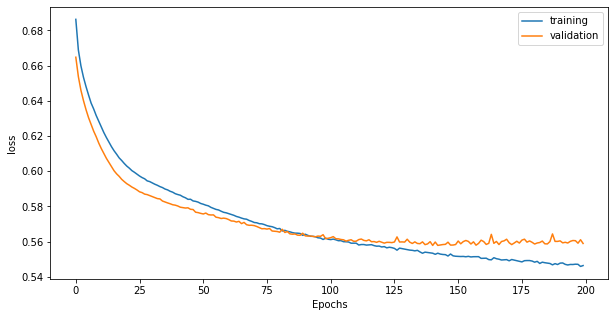

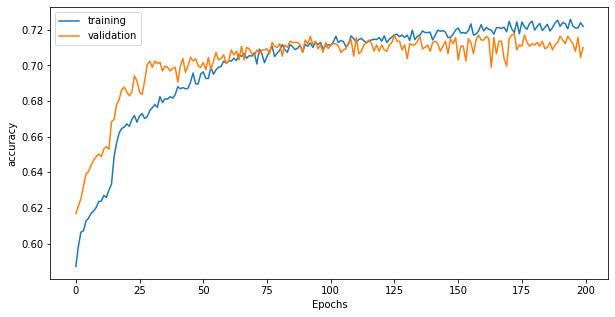

In [71]:
plot_history(res2.history, 'loss')
plot_history(res2.history, 'accuracy')

In [72]:
clf3 = keras.Sequential([
    keras.layers.Dense(100, activation='relu', input_shape=(10,5)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

clf3.compile(
    optimizer='adam', 
    loss='binary_crossentropy', 
    metrics=['accuracy'])

In [73]:
res3 = clf3.fit(
    X_train, y_train, 
    validation_data=(X_val, y_val),
    epochs=400)

Epoch 1/400
135/135 [==============================] - 0s 2ms/step - loss: 0.6319 - accuracy: 0.6263 - val_loss: 0.5960 - val_accuracy: 0.6975
Epoch 2/400
135/135 [==============================] - 0s 1ms/step - loss: 0.6012 - accuracy: 0.6759 - val_loss: 0.5824 - val_accuracy: 0.6947
Epoch 3/400
135/135 [==============================] - 0s 1ms/step - loss: 0.5886 - accuracy: 0.6796 - val_loss: 0.5747 - val_accuracy: 0.6961
Epoch 4/400
135/135 [==============================] - 0s 1ms/step - loss: 0.5841 - accuracy: 0.6894 - val_loss: 0.5831 - val_accuracy: 0.6905
Epoch 5/400
135/135 [==============================] - 0s 1ms/step - loss: 0.5807 - accuracy: 0.6898 - val_loss: 0.5690 - val_accuracy: 0.7038
Epoch 6/400
135/135 [==============================] - 0s 1ms/step - loss: 0.5705 - accuracy: 0.7021 - val_loss: 0.5752 - val_accuracy: 0.6954
Epoch 7/400
135/135 [==============================] - 0s 1ms/step - loss: 0.5678 - accuracy: 0.7017 - val_loss: 0.5664 - val_accuracy: 0.7128

135/135 [==============================] - 0s 1ms/step - loss: 0.5335 - accuracy: 0.7367 - val_loss: 0.5672 - val_accuracy: 0.7107
Epoch 54/400
135/135 [==============================] - 0s 1ms/step - loss: 0.5301 - accuracy: 0.7411 - val_loss: 0.5653 - val_accuracy: 0.7065
Epoch 55/400
135/135 [==============================] - 0s 1ms/step - loss: 0.5310 - accuracy: 0.7385 - val_loss: 0.5700 - val_accuracy: 0.7038
Epoch 56/400
135/135 [==============================] - 0s 1ms/step - loss: 0.5292 - accuracy: 0.7357 - val_loss: 0.5718 - val_accuracy: 0.7003
Epoch 57/400
135/135 [==============================] - 0s 1ms/step - loss: 0.5278 - accuracy: 0.7434 - val_loss: 0.5663 - val_accuracy: 0.7079
Epoch 58/400
135/135 [==============================] - 0s 1ms/step - loss: 0.5298 - accuracy: 0.7378 - val_loss: 0.5740 - val_accuracy: 0.7024
Epoch 59/400
135/135 [==============================] - 0s 1ms/step - loss: 0.5289 - accuracy: 0.7415 - val_loss: 0.5727 - val_accuracy: 0.7072
Epoch

Epoch 110/400
135/135 [==============================] - 0s 1ms/step - loss: 0.5121 - accuracy: 0.7476 - val_loss: 0.5748 - val_accuracy: 0.7031
Epoch 111/400
135/135 [==============================] - 0s 1ms/step - loss: 0.5126 - accuracy: 0.7554 - val_loss: 0.5857 - val_accuracy: 0.7024
Epoch 112/400
135/135 [==============================] - 0s 1ms/step - loss: 0.5124 - accuracy: 0.7490 - val_loss: 0.5717 - val_accuracy: 0.7114
Epoch 113/400
135/135 [==============================] - 0s 1ms/step - loss: 0.5136 - accuracy: 0.7462 - val_loss: 0.5769 - val_accuracy: 0.7003
Epoch 114/400
135/135 [==============================] - 0s 1ms/step - loss: 0.5138 - accuracy: 0.7450 - val_loss: 0.5765 - val_accuracy: 0.7121
Epoch 115/400
135/135 [==============================] - 0s 1ms/step - loss: 0.5118 - accuracy: 0.7466 - val_loss: 0.5791 - val_accuracy: 0.7017
Epoch 116/400
135/135 [==============================] - 0s 1ms/step - loss: 0.5097 - accuracy: 0.7478 - val_loss: 0.5799 - val_ac

135/135 [==============================] - 0s 1ms/step - loss: 0.5008 - accuracy: 0.7536 - val_loss: 0.5816 - val_accuracy: 0.7121
Epoch 167/400
135/135 [==============================] - 0s 1ms/step - loss: 0.4986 - accuracy: 0.7545 - val_loss: 0.5864 - val_accuracy: 0.7093
Epoch 168/400
135/135 [==============================] - 0s 1ms/step - loss: 0.5009 - accuracy: 0.7552 - val_loss: 0.5809 - val_accuracy: 0.7003
Epoch 169/400
135/135 [==============================] - 0s 1ms/step - loss: 0.4998 - accuracy: 0.7541 - val_loss: 0.5782 - val_accuracy: 0.7051
Epoch 170/400
135/135 [==============================] - 0s 1ms/step - loss: 0.4992 - accuracy: 0.7580 - val_loss: 0.5841 - val_accuracy: 0.7065
Epoch 171/400
135/135 [==============================] - 0s 1ms/step - loss: 0.4970 - accuracy: 0.7568 - val_loss: 0.5853 - val_accuracy: 0.7045
Epoch 172/400
135/135 [==============================] - 0s 1ms/step - loss: 0.4986 - accuracy: 0.7536 - val_loss: 0.5853 - val_accuracy: 0.7142

135/135 [==============================] - 0s 1ms/step - loss: 0.4846 - accuracy: 0.7603 - val_loss: 0.5920 - val_accuracy: 0.7058
Epoch 223/400
135/135 [==============================] - 0s 1ms/step - loss: 0.4852 - accuracy: 0.7612 - val_loss: 0.5983 - val_accuracy: 0.7072
Epoch 224/400
135/135 [==============================] - 0s 1ms/step - loss: 0.4870 - accuracy: 0.7617 - val_loss: 0.6083 - val_accuracy: 0.7058
Epoch 225/400
135/135 [==============================] - 0s 1ms/step - loss: 0.4866 - accuracy: 0.7571 - val_loss: 0.5976 - val_accuracy: 0.7051
Epoch 226/400
135/135 [==============================] - 0s 1ms/step - loss: 0.4854 - accuracy: 0.7659 - val_loss: 0.6035 - val_accuracy: 0.6947
Epoch 227/400
135/135 [==============================] - 0s 1ms/step - loss: 0.4853 - accuracy: 0.7561 - val_loss: 0.6045 - val_accuracy: 0.7086
Epoch 228/400
135/135 [==============================] - 0s 1ms/step - loss: 0.4865 - accuracy: 0.7592 - val_loss: 0.6055 - val_accuracy: 0.7086

135/135 [==============================] - 0s 1ms/step - loss: 0.4776 - accuracy: 0.7659 - val_loss: 0.6164 - val_accuracy: 0.6968
Epoch 279/400
135/135 [==============================] - 0s 1ms/step - loss: 0.4753 - accuracy: 0.7701 - val_loss: 0.6140 - val_accuracy: 0.6989
Epoch 280/400
135/135 [==============================] - 0s 1ms/step - loss: 0.4747 - accuracy: 0.7663 - val_loss: 0.6182 - val_accuracy: 0.7038
Epoch 281/400
135/135 [==============================] - 0s 1ms/step - loss: 0.4752 - accuracy: 0.7626 - val_loss: 0.6111 - val_accuracy: 0.6968
Epoch 282/400
135/135 [==============================] - 0s 1ms/step - loss: 0.4750 - accuracy: 0.7670 - val_loss: 0.6101 - val_accuracy: 0.7079
Epoch 283/400
135/135 [==============================] - 0s 1ms/step - loss: 0.4758 - accuracy: 0.7670 - val_loss: 0.6236 - val_accuracy: 0.6912
Epoch 284/400
135/135 [==============================] - 0s 1ms/step - loss: 0.4779 - accuracy: 0.7605 - val_loss: 0.6118 - val_accuracy: 0.7058

135/135 [==============================] - 0s 1ms/step - loss: 0.4647 - accuracy: 0.7677 - val_loss: 0.6282 - val_accuracy: 0.6933
Epoch 335/400
135/135 [==============================] - 0s 1ms/step - loss: 0.4645 - accuracy: 0.7682 - val_loss: 0.6401 - val_accuracy: 0.7107
Epoch 336/400
135/135 [==============================] - 0s 1ms/step - loss: 0.4669 - accuracy: 0.7724 - val_loss: 0.6239 - val_accuracy: 0.7038
Epoch 337/400
135/135 [==============================] - 0s 1ms/step - loss: 0.4649 - accuracy: 0.7710 - val_loss: 0.6253 - val_accuracy: 0.7086: 0s - loss: 0.4649 - accuracy: 0.77
Epoch 338/400
135/135 [==============================] - 0s 1ms/step - loss: 0.4626 - accuracy: 0.7717 - val_loss: 0.6379 - val_accuracy: 0.6975
Epoch 339/400
135/135 [==============================] - 0s 1ms/step - loss: 0.4630 - accuracy: 0.7719 - val_loss: 0.6339 - val_accuracy: 0.6961
Epoch 340/400
135/135 [==============================] - 0s 1ms/step - loss: 0.4662 - accuracy: 0.7680 - val

135/135 [==============================] - 0s 1ms/step - loss: 0.4607 - accuracy: 0.7752 - val_loss: 0.6502 - val_accuracy: 0.7065
Epoch 391/400
135/135 [==============================] - 0s 2ms/step - loss: 0.4577 - accuracy: 0.7752 - val_loss: 0.6554 - val_accuracy: 0.6954
Epoch 392/400
135/135 [==============================] - 0s 1ms/step - loss: 0.4564 - accuracy: 0.7742 - val_loss: 0.6539 - val_accuracy: 0.7045
Epoch 393/400
135/135 [==============================] - 0s 2ms/step - loss: 0.4539 - accuracy: 0.7823 - val_loss: 0.6496 - val_accuracy: 0.6905
Epoch 394/400
135/135 [==============================] - 0s 1ms/step - loss: 0.4593 - accuracy: 0.7749 - val_loss: 0.6435 - val_accuracy: 0.6975
Epoch 395/400
135/135 [==============================] - 0s 2ms/step - loss: 0.4560 - accuracy: 0.7770 - val_loss: 0.6410 - val_accuracy: 0.7038
Epoch 396/400
135/135 [==============================] - 0s 1ms/step - loss: 0.4547 - accuracy: 0.7796 - val_loss: 0.6526 - val_accuracy: 0.6912

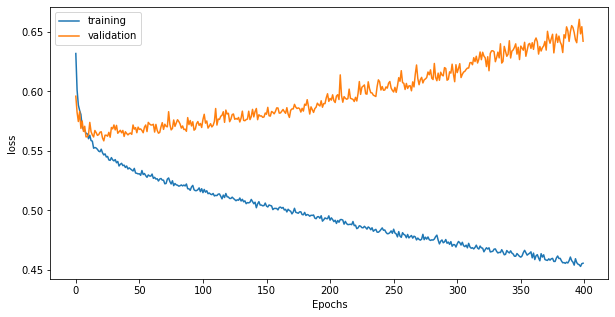

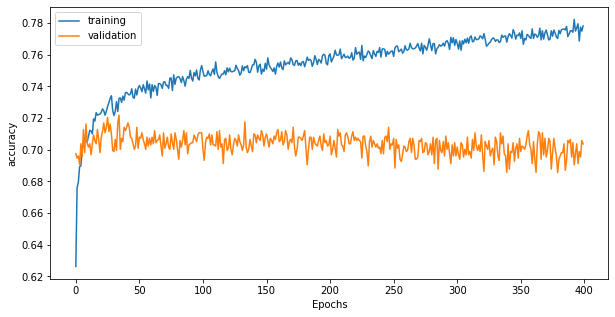

In [74]:
plot_history(res3.history, 'loss')
plot_history(res3.history, 'accuracy')

In [75]:
clf1.evaluate(X_test, y_test)
clf2.evaluate(X_test, y_test)
clf3.evaluate(X_test, y_test)

45/45 [==============================] - 0s 909us/step - loss: 0.6352 - accuracy: 0.7204


[0.6352461576461792, 0.7204450368881226]

In [76]:
print(f'Model #1: {clf1.count_params()}')
print(f'Model #2: {clf2.count_params()}')
print(f'Model #3: {clf3.count_params()}')

Model #1: 71
Model #2: 561
Model #3: 10801


In [77]:
clf3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 10, 100)           600       
_________________________________________________________________
dense_6 (Dense)              (None, 10, 100)           10100     
_________________________________________________________________
dense_7 (Dense)              (None, 10, 1)             101       
Total params: 10,801
Trainable params: 10,801
Non-trainable params: 0
_________________________________________________________________


In [78]:
clf4 = keras.Sequential([
    keras.layers.Dense(500, activation='relu', input_shape=(10,5)),
    keras.layers.Dense(500, activation='relu'),
    keras.layers.Dense(5, activation='sigmoid')
])

clf4.compile(
    optimizer='adam', 
    loss='binary_crossentropy', 
    metrics=['accuracy'])

In [79]:
res3 = clf3.fit(
    X_train, y_train, 
    validation_data=(X_val, y_val),
    epochs=1000)

Epoch 1/1000
135/135 [==============================] - 0s 2ms/step - loss: 0.4527 - accuracy: 0.7793 - val_loss: 0.6453 - val_accuracy: 0.6912
Epoch 2/1000
135/135 [==============================] - 0s 1ms/step - loss: 0.4545 - accuracy: 0.7805 - val_loss: 0.6498 - val_accuracy: 0.6898
Epoch 3/1000
135/135 [==============================] - 0s 2ms/step - loss: 0.4553 - accuracy: 0.7747 - val_loss: 0.6429 - val_accuracy: 0.6996
Epoch 4/1000
135/135 [==============================] - 0s 2ms/step - loss: 0.4526 - accuracy: 0.7772 - val_loss: 0.6433 - val_accuracy: 0.7017
Epoch 5/1000
135/135 [==============================] - 0s 2ms/step - loss: 0.4527 - accuracy: 0.7777 - val_loss: 0.6449 - val_accuracy: 0.6975
Epoch 6/1000
135/135 [==============================] - 0s 2ms/step - loss: 0.4523 - accuracy: 0.7756 - val_loss: 0.6483 - val_accuracy: 0.6947
Epoch 7/1000
135/135 [==============================] - 0s 2ms/step - loss: 0.4537 - accuracy: 0.7719 - val_loss: 0.6416 - val_accuracy:

135/135 [==============================] - 0s 1ms/step - loss: 0.4494 - accuracy: 0.7779 - val_loss: 0.6627 - val_accuracy: 0.6947
Epoch 58/1000
135/135 [==============================] - 0s 1ms/step - loss: 0.4502 - accuracy: 0.7796 - val_loss: 0.6645 - val_accuracy: 0.7031
Epoch 59/1000
135/135 [==============================] - 0s 1ms/step - loss: 0.4478 - accuracy: 0.7768 - val_loss: 0.6669 - val_accuracy: 0.7003
Epoch 60/1000
135/135 [==============================] - 0s 1ms/step - loss: 0.4458 - accuracy: 0.7786 - val_loss: 0.6732 - val_accuracy: 0.7010
Epoch 61/1000
135/135 [==============================] - 0s 1ms/step - loss: 0.4502 - accuracy: 0.7719 - val_loss: 0.6667 - val_accuracy: 0.6919
Epoch 62/1000
135/135 [==============================] - 0s 2ms/step - loss: 0.4467 - accuracy: 0.7800 - val_loss: 0.6732 - val_accuracy: 0.7038
Epoch 63/1000
135/135 [==============================] - 0s 2ms/step - loss: 0.4443 - accuracy: 0.7754 - val_loss: 0.6649 - val_accuracy: 0.7058

135/135 [==============================] - 0s 1ms/step - loss: 0.4406 - accuracy: 0.7803 - val_loss: 0.6817 - val_accuracy: 0.6982
Epoch 114/1000
135/135 [==============================] - 0s 1ms/step - loss: 0.4375 - accuracy: 0.7821 - val_loss: 0.6869 - val_accuracy: 0.6864
Epoch 115/1000
135/135 [==============================] - 0s 1ms/step - loss: 0.4374 - accuracy: 0.7828 - val_loss: 0.6858 - val_accuracy: 0.6968
Epoch 116/1000
135/135 [==============================] - 0s 2ms/step - loss: 0.4372 - accuracy: 0.7849 - val_loss: 0.6935 - val_accuracy: 0.6996
Epoch 117/1000
135/135 [==============================] - 0s 1ms/step - loss: 0.4400 - accuracy: 0.7835 - val_loss: 0.6917 - val_accuracy: 0.7038
Epoch 118/1000
135/135 [==============================] - 0s 1ms/step - loss: 0.4396 - accuracy: 0.7816 - val_loss: 0.6978 - val_accuracy: 0.6989
Epoch 119/1000
135/135 [==============================] - 0s 1ms/step - loss: 0.4426 - accuracy: 0.7814 - val_loss: 0.6915 - val_accuracy: 

135/135 [==============================] - 0s 1ms/step - loss: 0.4354 - accuracy: 0.7840 - val_loss: 0.6965 - val_accuracy: 0.6947
Epoch 170/1000
135/135 [==============================] - 0s 1ms/step - loss: 0.4334 - accuracy: 0.7872 - val_loss: 0.7089 - val_accuracy: 0.7010
Epoch 171/1000
135/135 [==============================] - 0s 1ms/step - loss: 0.4349 - accuracy: 0.7891 - val_loss: 0.7108 - val_accuracy: 0.6912
Epoch 172/1000
135/135 [==============================] - 0s 1ms/step - loss: 0.4324 - accuracy: 0.7854 - val_loss: 0.7089 - val_accuracy: 0.7058
Epoch 173/1000
135/135 [==============================] - 0s 1ms/step - loss: 0.4378 - accuracy: 0.7867 - val_loss: 0.7119 - val_accuracy: 0.6975
Epoch 174/1000
135/135 [==============================] - 0s 1ms/step - loss: 0.4327 - accuracy: 0.7872 - val_loss: 0.7081 - val_accuracy: 0.7017
Epoch 175/1000
135/135 [==============================] - 0s 1ms/step - loss: 0.4363 - accuracy: 0.7833 - val_loss: 0.7230 - val_accuracy: 

135/135 [==============================] - 0s 1ms/step - loss: 0.4344 - accuracy: 0.7854 - val_loss: 0.7234 - val_accuracy: 0.7086
Epoch 226/1000
135/135 [==============================] - 0s 1ms/step - loss: 0.4324 - accuracy: 0.7840 - val_loss: 0.7253 - val_accuracy: 0.6919
Epoch 227/1000
135/135 [==============================] - 0s 1ms/step - loss: 0.4291 - accuracy: 0.7867 - val_loss: 0.7239 - val_accuracy: 0.7121
Epoch 228/1000
135/135 [==============================] - 0s 1ms/step - loss: 0.4265 - accuracy: 0.7904 - val_loss: 0.7227 - val_accuracy: 0.7010
Epoch 229/1000
135/135 [==============================] - 0s 1ms/step - loss: 0.4252 - accuracy: 0.7863 - val_loss: 0.7203 - val_accuracy: 0.6954
Epoch 230/1000
135/135 [==============================] - 0s 1ms/step - loss: 0.4255 - accuracy: 0.7854 - val_loss: 0.7260 - val_accuracy: 0.7058
Epoch 231/1000
135/135 [==============================] - 0s 1ms/step - loss: 0.4265 - accuracy: 0.7902 - val_loss: 0.7216 - val_accuracy: 

135/135 [==============================] - 0s 1ms/step - loss: 0.4220 - accuracy: 0.7872 - val_loss: 0.7311 - val_accuracy: 0.6996
Epoch 282/1000
135/135 [==============================] - 0s 1ms/step - loss: 0.4221 - accuracy: 0.7886 - val_loss: 0.7515 - val_accuracy: 0.6982
Epoch 283/1000
135/135 [==============================] - 0s 1ms/step - loss: 0.4225 - accuracy: 0.7870 - val_loss: 0.7397 - val_accuracy: 0.6898
Epoch 284/1000
135/135 [==============================] - 0s 1ms/step - loss: 0.4230 - accuracy: 0.7904 - val_loss: 0.7457 - val_accuracy: 0.7031
Epoch 285/1000
135/135 [==============================] - 0s 1ms/step - loss: 0.4255 - accuracy: 0.7860 - val_loss: 0.7402 - val_accuracy: 0.7065
Epoch 286/1000
135/135 [==============================] - 0s 1ms/step - loss: 0.4250 - accuracy: 0.7904 - val_loss: 0.7631 - val_accuracy: 0.6989
Epoch 287/1000
135/135 [==============================] - 0s 1ms/step - loss: 0.4249 - accuracy: 0.7877 - val_loss: 0.7535 - val_accuracy: 

135/135 [==============================] - 0s 1ms/step - loss: 0.4187 - accuracy: 0.7946 - val_loss: 0.7432 - val_accuracy: 0.6982
Epoch 338/1000
135/135 [==============================] - 0s 1ms/step - loss: 0.4156 - accuracy: 0.7914 - val_loss: 0.7642 - val_accuracy: 0.6892
Epoch 339/1000
135/135 [==============================] - 0s 1ms/step - loss: 0.4212 - accuracy: 0.7881 - val_loss: 0.7549 - val_accuracy: 0.6898
Epoch 340/1000
135/135 [==============================] - 0s 1ms/step - loss: 0.4198 - accuracy: 0.7916 - val_loss: 0.7593 - val_accuracy: 0.6836
Epoch 341/1000
135/135 [==============================] - 0s 1ms/step - loss: 0.4186 - accuracy: 0.7935 - val_loss: 0.7640 - val_accuracy: 0.6989
Epoch 342/1000
135/135 [==============================] - 0s 1ms/step - loss: 0.4253 - accuracy: 0.7900 - val_loss: 0.7677 - val_accuracy: 0.7003
Epoch 343/1000
135/135 [==============================] - 0s 1ms/step - loss: 0.4214 - accuracy: 0.7925 - val_loss: 0.7565 - val_accuracy: 

135/135 [==============================] - 0s 1ms/step - loss: 0.4191 - accuracy: 0.7923 - val_loss: 0.7684 - val_accuracy: 0.6975
Epoch 394/1000
135/135 [==============================] - 0s 1ms/step - loss: 0.4148 - accuracy: 0.7921 - val_loss: 0.7714 - val_accuracy: 0.6989
Epoch 395/1000
135/135 [==============================] - 0s 1ms/step - loss: 0.4149 - accuracy: 0.7944 - val_loss: 0.7884 - val_accuracy: 0.6898
Epoch 396/1000
135/135 [==============================] - 0s 1ms/step - loss: 0.4166 - accuracy: 0.7939 - val_loss: 0.7551 - val_accuracy: 0.6947
Epoch 397/1000
135/135 [==============================] - 0s 1ms/step - loss: 0.4157 - accuracy: 0.7972 - val_loss: 0.7860 - val_accuracy: 0.6961
Epoch 398/1000
135/135 [==============================] - 0s 1ms/step - loss: 0.4161 - accuracy: 0.7900 - val_loss: 0.7809 - val_accuracy: 0.6961
Epoch 399/1000
135/135 [==============================] - 0s 1ms/step - loss: 0.4138 - accuracy: 0.7942 - val_loss: 0.7797 - val_accuracy: 

135/135 [==============================] - 0s 1ms/step - loss: 0.4135 - accuracy: 0.7914 - val_loss: 0.7921 - val_accuracy: 0.6871
Epoch 450/1000
135/135 [==============================] - 0s 1ms/step - loss: 0.4154 - accuracy: 0.7937 - val_loss: 0.7854 - val_accuracy: 0.6912
Epoch 451/1000
135/135 [==============================] - 0s 1ms/step - loss: 0.4131 - accuracy: 0.7909 - val_loss: 0.7885 - val_accuracy: 0.6857
Epoch 452/1000
135/135 [==============================] - 0s 1ms/step - loss: 0.4107 - accuracy: 0.7939 - val_loss: 0.8128 - val_accuracy: 0.6982
Epoch 453/1000
135/135 [==============================] - 0s 1ms/step - loss: 0.4129 - accuracy: 0.7960 - val_loss: 0.8044 - val_accuracy: 0.6878
Epoch 454/1000
135/135 [==============================] - 0s 1ms/step - loss: 0.4118 - accuracy: 0.7955 - val_loss: 0.8304 - val_accuracy: 0.6954
Epoch 455/1000
135/135 [==============================] - 0s 1ms/step - loss: 0.4131 - accuracy: 0.7974 - val_loss: 0.7925 - val_accuracy: 

135/135 [==============================] - 0s 1ms/step - loss: 0.4119 - accuracy: 0.7925 - val_loss: 0.8144 - val_accuracy: 0.6933
Epoch 506/1000
135/135 [==============================] - 0s 1ms/step - loss: 0.4114 - accuracy: 0.7932 - val_loss: 0.8166 - val_accuracy: 0.7045
Epoch 507/1000
135/135 [==============================] - 0s 1ms/step - loss: 0.4114 - accuracy: 0.7939 - val_loss: 0.8187 - val_accuracy: 0.6801
Epoch 508/1000
135/135 [==============================] - 0s 1ms/step - loss: 0.4115 - accuracy: 0.7909 - val_loss: 0.8046 - val_accuracy: 0.6912
Epoch 509/1000
135/135 [==============================] - 0s 1ms/step - loss: 0.4083 - accuracy: 0.7955 - val_loss: 0.8086 - val_accuracy: 0.7017
Epoch 510/1000
135/135 [==============================] - 0s 1ms/step - loss: 0.4105 - accuracy: 0.7902 - val_loss: 0.8307 - val_accuracy: 0.6947
Epoch 511/1000
135/135 [==============================] - 0s 1ms/step - loss: 0.4114 - accuracy: 0.7928 - val_loss: 0.8103 - val_accuracy: 

135/135 [==============================] - 0s 1ms/step - loss: 0.4051 - accuracy: 0.7969 - val_loss: 0.8224 - val_accuracy: 0.6857
Epoch 562/1000
135/135 [==============================] - 0s 1ms/step - loss: 0.4076 - accuracy: 0.7942 - val_loss: 0.8177 - val_accuracy: 0.6885
Epoch 563/1000
135/135 [==============================] - 0s 1ms/step - loss: 0.4076 - accuracy: 0.7955 - val_loss: 0.8249 - val_accuracy: 0.7010
Epoch 564/1000
135/135 [==============================] - 0s 1ms/step - loss: 0.4073 - accuracy: 0.7923 - val_loss: 0.8250 - val_accuracy: 0.6933
Epoch 565/1000
135/135 [==============================] - 0s 1ms/step - loss: 0.4079 - accuracy: 0.7958 - val_loss: 0.8287 - val_accuracy: 0.7031
Epoch 566/1000
135/135 [==============================] - 0s 1ms/step - loss: 0.4093 - accuracy: 0.7928 - val_loss: 0.8294 - val_accuracy: 0.6926
Epoch 567/1000
135/135 [==============================] - 0s 1ms/step - loss: 0.4085 - accuracy: 0.7983 - val_loss: 0.8228 - val_accuracy: 

135/135 [==============================] - 0s 1ms/step - loss: 0.4076 - accuracy: 0.7990 - val_loss: 0.8376 - val_accuracy: 0.6871
Epoch 618/1000
135/135 [==============================] - 0s 1ms/step - loss: 0.4060 - accuracy: 0.7946 - val_loss: 0.8419 - val_accuracy: 0.7010
Epoch 619/1000
135/135 [==============================] - 0s 1ms/step - loss: 0.4114 - accuracy: 0.7946 - val_loss: 0.8394 - val_accuracy: 0.6857
Epoch 620/1000
135/135 [==============================] - 0s 1ms/step - loss: 0.4068 - accuracy: 0.7951 - val_loss: 0.8309 - val_accuracy: 0.6892
Epoch 621/1000
135/135 [==============================] - 0s 1ms/step - loss: 0.4054 - accuracy: 0.7949 - val_loss: 0.8281 - val_accuracy: 0.6829
Epoch 622/1000
135/135 [==============================] - 0s 1ms/step - loss: 0.4066 - accuracy: 0.7981 - val_loss: 0.8248 - val_accuracy: 0.6912
Epoch 623/1000
135/135 [==============================] - 0s 1ms/step - loss: 0.4033 - accuracy: 0.8004 - val_loss: 0.8464 - val_accuracy: 

135/135 [==============================] - 0s 1ms/step - loss: 0.4060 - accuracy: 0.7997 - val_loss: 0.8452 - val_accuracy: 0.6919
Epoch 674/1000
135/135 [==============================] - 0s 1ms/step - loss: 0.4076 - accuracy: 0.7949 - val_loss: 0.8470 - val_accuracy: 0.6885
Epoch 675/1000
135/135 [==============================] - 0s 1ms/step - loss: 0.4045 - accuracy: 0.7965 - val_loss: 0.8524 - val_accuracy: 0.7010
Epoch 676/1000
135/135 [==============================] - 0s 1ms/step - loss: 0.4038 - accuracy: 0.7942 - val_loss: 0.8694 - val_accuracy: 0.6961
Epoch 677/1000
135/135 [==============================] - 0s 1ms/step - loss: 0.4051 - accuracy: 0.7983 - val_loss: 0.8599 - val_accuracy: 0.6892
Epoch 678/1000
135/135 [==============================] - 0s 1ms/step - loss: 0.4027 - accuracy: 0.7983 - val_loss: 0.8563 - val_accuracy: 0.6919
Epoch 679/1000
135/135 [==============================] - 0s 1ms/step - loss: 0.4009 - accuracy: 0.7976 - val_loss: 0.8636 - val_accuracy: 

135/135 [==============================] - 0s 1ms/step - loss: 0.4006 - accuracy: 0.7995 - val_loss: 0.8515 - val_accuracy: 0.6912
Epoch 730/1000
135/135 [==============================] - 0s 1ms/step - loss: 0.4018 - accuracy: 0.7995 - val_loss: 0.8542 - val_accuracy: 0.6961
Epoch 731/1000
135/135 [==============================] - 0s 1ms/step - loss: 0.4027 - accuracy: 0.7972 - val_loss: 0.8550 - val_accuracy: 0.6982
Epoch 732/1000
135/135 [==============================] - 0s 1ms/step - loss: 0.4008 - accuracy: 0.7960 - val_loss: 0.8458 - val_accuracy: 0.6878
Epoch 733/1000
135/135 [==============================] - 0s 1ms/step - loss: 0.4013 - accuracy: 0.7981 - val_loss: 0.8695 - val_accuracy: 0.6864
Epoch 734/1000
135/135 [==============================] - 0s 1ms/step - loss: 0.3987 - accuracy: 0.7988 - val_loss: 0.8558 - val_accuracy: 0.6892
Epoch 735/1000
135/135 [==============================] - 0s 1ms/step - loss: 0.4005 - accuracy: 0.8009 - val_loss: 0.8542 - val_accuracy: 

135/135 [==============================] - 0s 1ms/step - loss: 0.4005 - accuracy: 0.7979 - val_loss: 0.8578 - val_accuracy: 0.6996
Epoch 786/1000
135/135 [==============================] - 0s 1ms/step - loss: 0.4009 - accuracy: 0.7974 - val_loss: 0.8530 - val_accuracy: 0.6892
Epoch 787/1000
135/135 [==============================] - 0s 1ms/step - loss: 0.3995 - accuracy: 0.7997 - val_loss: 0.8667 - val_accuracy: 0.6905
Epoch 788/1000
135/135 [==============================] - 0s 1ms/step - loss: 0.3989 - accuracy: 0.7972 - val_loss: 0.8833 - val_accuracy: 0.6912
Epoch 789/1000
135/135 [==============================] - 0s 1ms/step - loss: 0.3978 - accuracy: 0.7974 - val_loss: 0.8753 - val_accuracy: 0.6947
Epoch 790/1000
135/135 [==============================] - 0s 1ms/step - loss: 0.3978 - accuracy: 0.7995 - val_loss: 0.8633 - val_accuracy: 0.6857
Epoch 791/1000
135/135 [==============================] - 0s 1ms/step - loss: 0.3978 - accuracy: 0.7981 - val_loss: 0.8778 - val_accuracy: 

135/135 [==============================] - 0s 1ms/step - loss: 0.3986 - accuracy: 0.8004 - val_loss: 0.8653 - val_accuracy: 0.6850
Epoch 842/1000
135/135 [==============================] - 0s 1ms/step - loss: 0.3983 - accuracy: 0.7979 - val_loss: 0.8768 - val_accuracy: 0.6947
Epoch 843/1000
135/135 [==============================] - 0s 1ms/step - loss: 0.3994 - accuracy: 0.7990 - val_loss: 0.8881 - val_accuracy: 0.6905
Epoch 844/1000
135/135 [==============================] - 0s 1ms/step - loss: 0.3947 - accuracy: 0.8053 - val_loss: 0.8849 - val_accuracy: 0.6864
Epoch 845/1000
135/135 [==============================] - 0s 1ms/step - loss: 0.4018 - accuracy: 0.7979 - val_loss: 0.8624 - val_accuracy: 0.6919
Epoch 846/1000
135/135 [==============================] - 0s 1ms/step - loss: 0.3992 - accuracy: 0.7997 - val_loss: 0.9030 - val_accuracy: 0.6905
Epoch 847/1000
135/135 [==============================] - 0s 1ms/step - loss: 0.3985 - accuracy: 0.8006 - val_loss: 0.8985 - val_accuracy: 

135/135 [==============================] - 0s 1ms/step - loss: 0.3948 - accuracy: 0.7979 - val_loss: 0.9146 - val_accuracy: 0.6933
Epoch 898/1000
135/135 [==============================] - 0s 1ms/step - loss: 0.3976 - accuracy: 0.7997 - val_loss: 0.8912 - val_accuracy: 0.6794
Epoch 899/1000
135/135 [==============================] - 0s 1ms/step - loss: 0.3992 - accuracy: 0.8000 - val_loss: 0.8695 - val_accuracy: 0.6919
Epoch 900/1000
135/135 [==============================] - 0s 1ms/step - loss: 0.3956 - accuracy: 0.8025 - val_loss: 0.8929 - val_accuracy: 0.6892
Epoch 901/1000
135/135 [==============================] - 0s 1ms/step - loss: 0.3955 - accuracy: 0.8006 - val_loss: 0.8966 - val_accuracy: 0.6940
Epoch 902/1000
135/135 [==============================] - 0s 1ms/step - loss: 0.3970 - accuracy: 0.8013 - val_loss: 0.8847 - val_accuracy: 0.6892
Epoch 903/1000
135/135 [==============================] - 0s 1ms/step - loss: 0.3953 - accuracy: 0.8016 - val_loss: 0.8788 - val_accuracy: 

Epoch 953/1000
135/135 [==============================] - 0s 1ms/step - loss: 0.3927 - accuracy: 0.8018 - val_loss: 0.9148 - val_accuracy: 0.6892
Epoch 954/1000
135/135 [==============================] - 0s 1ms/step - loss: 0.3965 - accuracy: 0.7969 - val_loss: 0.9110 - val_accuracy: 0.6933
Epoch 955/1000
135/135 [==============================] - 0s 1ms/step - loss: 0.3974 - accuracy: 0.8023 - val_loss: 0.9164 - val_accuracy: 0.6822
Epoch 956/1000
135/135 [==============================] - 0s 1ms/step - loss: 0.3963 - accuracy: 0.8009 - val_loss: 0.9160 - val_accuracy: 0.6871
Epoch 957/1000
135/135 [==============================] - 0s 1ms/step - loss: 0.3965 - accuracy: 0.7993 - val_loss: 0.9084 - val_accuracy: 0.6926
Epoch 958/1000
135/135 [==============================] - 0s 1ms/step - loss: 0.3990 - accuracy: 0.7986 - val_loss: 0.8976 - val_accuracy: 0.6912
Epoch 959/1000
135/135 [==============================] - 0s 1ms/step - loss: 0.3945 - accuracy: 0.8020 - val_loss: 0.9392 -

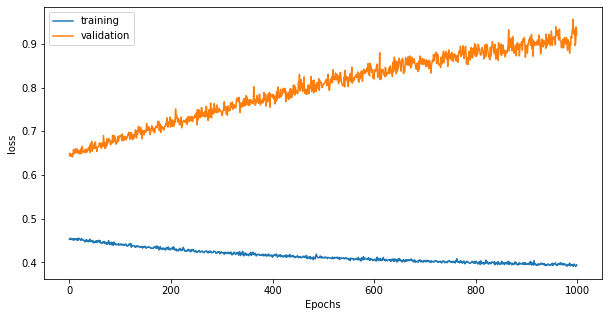

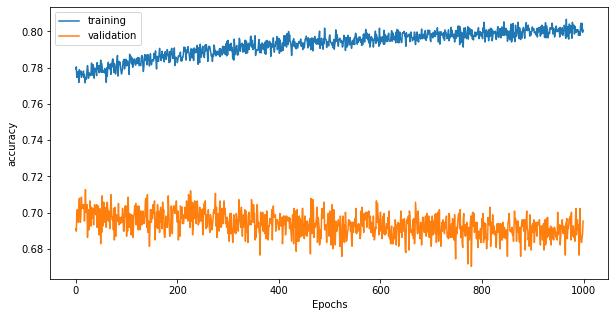

In [80]:
plot_history(res3.history, 'loss')
plot_history(res3.history, 'accuracy')

In [81]:
clf1.evaluate(X_test, y_test)
clf2.evaluate(X_test, y_test)
clf3.evaluate(X_test, y_test)

45/45 [==============================] - 0s 687us/step - loss: 0.9434 - accuracy: 0.7086


[0.9434220194816589, 0.7086231112480164]

In [82]:
print(f'Model #1: {clf1.count_params()}')
print(f'Model #2: {clf2.count_params()}')
print(f'Model #3: {clf3.count_params()}')

Model #1: 71
Model #2: 561
Model #3: 10801


In [83]:
clf3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 10, 100)           600       
_________________________________________________________________
dense_6 (Dense)              (None, 10, 100)           10100     
_________________________________________________________________
dense_7 (Dense)              (None, 10, 1)             101       
Total params: 10,801
Trainable params: 10,801
Non-trainable params: 0
_________________________________________________________________
